# 💸 Banknote Authentication 💸

This is a [`K-Means`]("https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html") Clustering project.

The purpose of this project is to build a [`K-Means`]("https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html") clusterng model to detect if the banknote is genuine or forged 
so that people don't need to conduct inspection.

## About Data

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:
* **Variance** - variance of Wavelet Transformed image (continuous)
* **Skewness** -skewness of Wavelet Transformed image (continuous)
* **Curtosis** -curtosis of Wavelet Transformed image (continuous)
* **Entropy** -entropy of image (continuous)

Data Source: https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data?datasetId=84803&sortBy=voteCount&searchQuery=clustering

## Standard Imports

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [151]:
df = pd.read_csv("data/BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Data Exploration

In [152]:
df.shape

(1372, 5)

In [153]:
df.size

6860

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [155]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


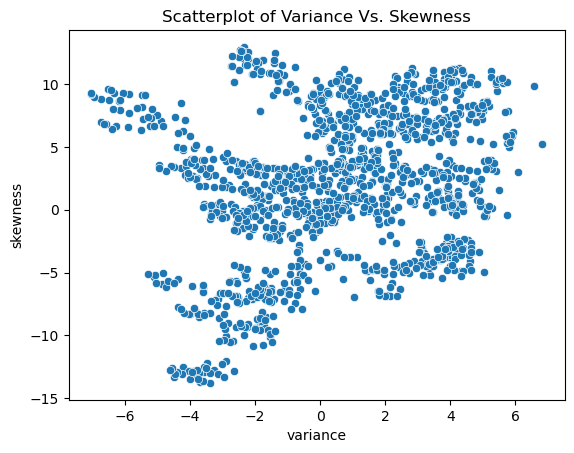

In [156]:
sns.scatterplot(x=df.variance,
           y=df.skewness, 
           data=df)
plt.title("Scatterplot of Variance Vs. Skewness");

Assessments from above scatterplot:
* The data distribution in the graph is not too widespread, neither too centered at one place, therefore it is worth trying to computing K-Means on this dataset.* 
There is no obvious cluster in spherical shapes so we should expect the K-Means model won't work perfectly here.

In [157]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


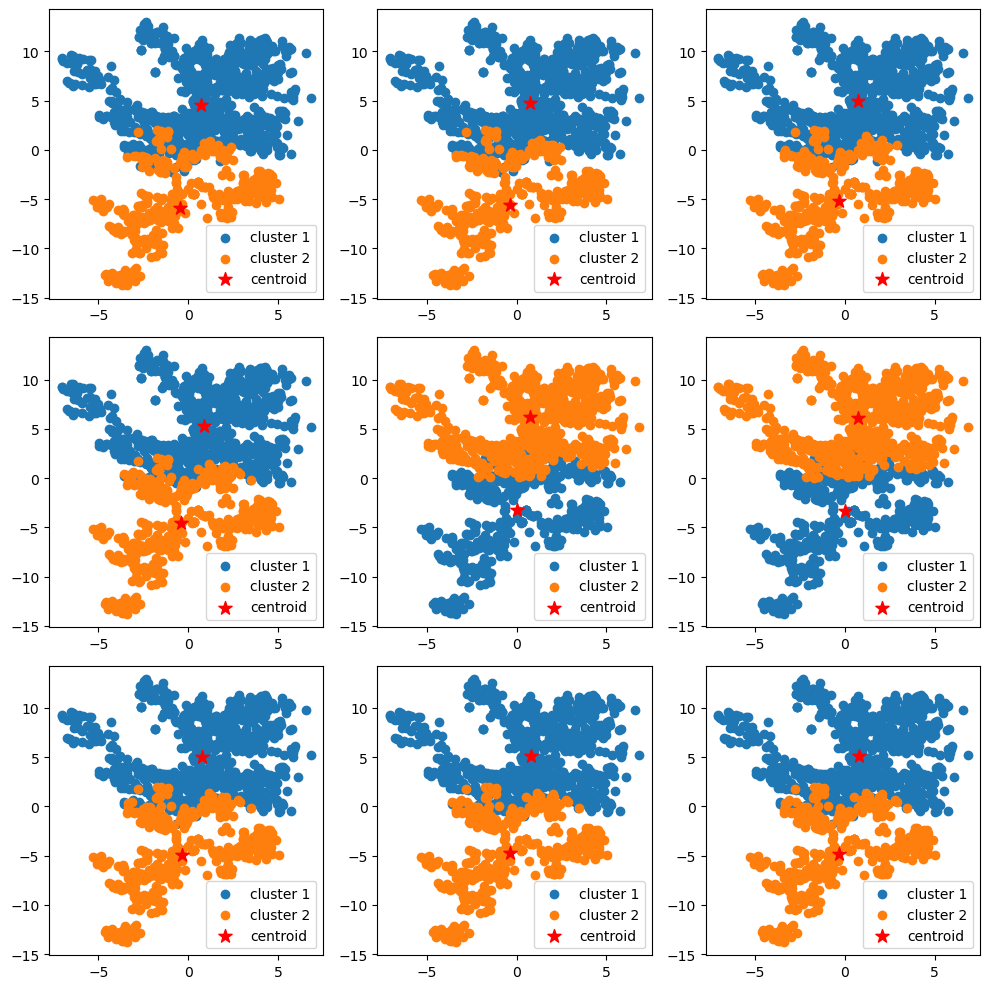

In [158]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = np.ravel(ax)
for i in range(n_iter):
  km = KMeans(n_clusters=2,max_iter=3,n_init='auto')
  km.fit(df)
  centroids=km.cluster_centers_
  ax[i].scatter(df[km.labels_== 0]['variance'], df[km.labels_ == 0]['skewness'],label='cluster 1')
  ax[i].scatter(df[km.labels_ == 1]['variance'], df[km.labels_ == 1]['skewness'],label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1],c='r', marker='*', s=100, label='centroid')
  ax[i].legend()
  plt.tight_layout();

* After running K-Means for 9 times, the results we got are very similar, which means the K-Means here is stable.

**Predicted Clusters:**

In [159]:
df1=df.copy()
df1.drop(['curtosis','entropy','class'],axis=1,inplace=True)
df1.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [160]:
clusters = KMeans(2)
clusters.fit(df1)
df1['clusterid'] = clusters.labels_

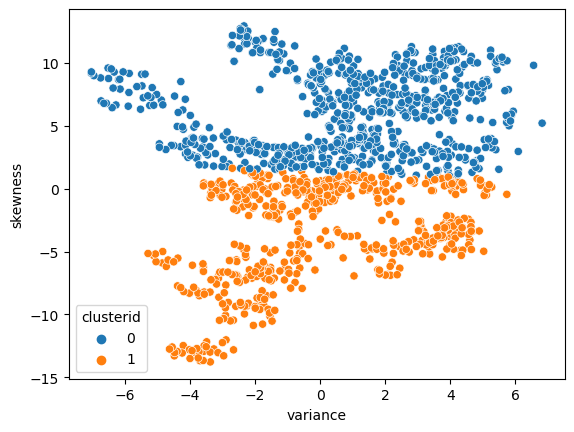

In [161]:
sns.scatterplot(x=df1['variance'],y=df1['skewness'],data=df1,hue=df1['clusterid']);

In [162]:
clusters.cluster_centers_

array([[ 0.86899936,  6.12098197],
       [-0.12464848, -3.46390785]])

In [163]:
df1.groupby( 'clusterid' ).describe()

variance                                                         \
             count      mean       std     min       25%      50%     75%   
clusterid                                                                   
0            775.0  0.859873  2.908534 -7.0421 -0.962905  1.10500  3.1866   
1            597.0 -0.119458  2.657244 -5.2943 -2.197900 -0.64472  2.0165   

                  skewness                                                \
              max    count      mean       std      min      25%     50%   
clusterid                                                                  
0          6.8248    775.0  6.096962  3.101221   1.0367  3.24875  6.1416   
1          5.7403    597.0 -3.496946  3.829786 -13.7731 -6.31130 -2.9674   

                              
                75%      max  
clusterid                     
0          8.792350  12.9516  
1         -0.080711   1.6327

In [164]:
scaler = StandardScaler() 
scaled_df1 = scaler.fit_transform( df1[["variance", "skewness"]] ) 
scaled_df1[0:5]

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       [ 1.06374236,  1.29547754],
       [-0.03677175, -1.0870383 ]])

In [165]:
scaled_df1=pd.DataFrame(scaled_df1,columns=['variance','skewness'])
scaled_df1

,variance,skewness
0,1.121806,1.149455
1,1.447066,1.064453
2,1.207810,-0.777352
3,1.063742,1.295478
4,-0.036772,-1.087038
...,...,...
1367,-0.009711,-0.097693
1368,-0.641313,-1.158984
1369,-1.472357,-2.621646
1370,-1.406693,-1.756471


In [166]:
clusters_new = KMeans( 2, random_state=42 ) 
clusters_new.fit( scaled_df1 ) 
df1["clusterid_new"] = clusters_new.labels_ 
df1.head()

,variance,skewness,clusterid,clusterid_new
0,3.62160,8.6661,0,1
1,4.54590,8.1674,0,1
2,3.86600,-2.6383,1,1
3,3.45660,9.5228,0,1
4,0.32924,-4.4552,1,0


## Evaluating the Model

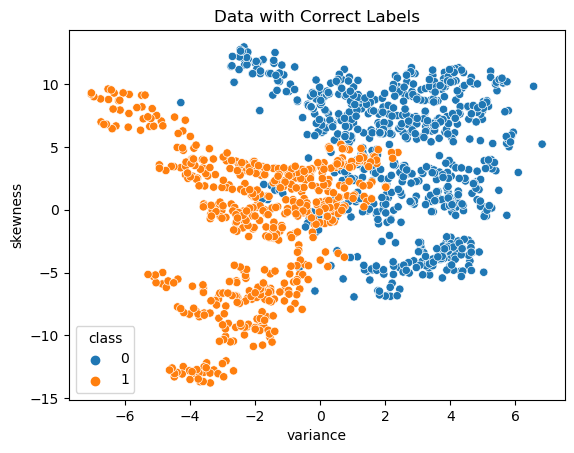

In [167]:
sns.scatterplot(x=df['variance'],y=df['skewness'],data=df,hue=df['class'])
plt.title("Data with Correct Labels");

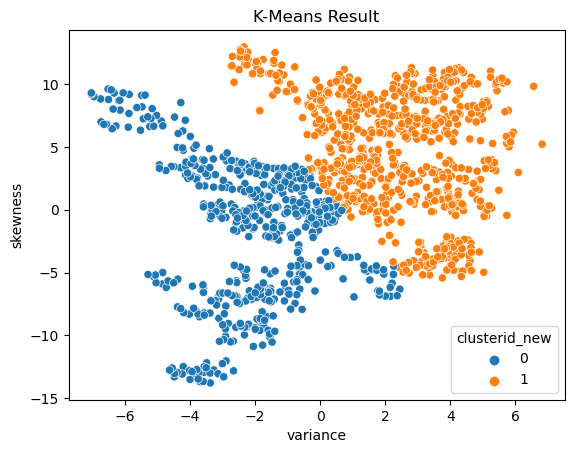

In [168]:
sns.scatterplot(x=df1['variance'],y=df1['skewness'],data=df1,hue=df1['clusterid_new'])
plt.title("K-Means Result");


In [169]:
clusters_new.cluster_centers_

array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]])

In [170]:
df1["clusterid_new"] = df1["clusterid_new"].map({0: 1, 1: 0})

In [171]:
df1.shape

(1372, 4)

In [172]:
df1.head()

,variance,skewness,clusterid,clusterid_new
0,3.62160,8.6661,0,0
1,4.54590,8.1674,0,0
2,3.86600,-2.6383,1,0
3,3.45660,9.5228,0,0
4,0.32924,-4.4552,1,1


In [173]:
correct=0
for i in range(0,1371):
  if df['class'][i]==df1['clusterid_new'][i]:
   correct=correct+1

print(correct/1371)

0.8774617067833698


## The Accuracy of the model is 87.75%